In [162]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import math

df = pd.read_csv("/content/HR_comma_sep.csv")

print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get basic statistics of the dataset
print(df.describe())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

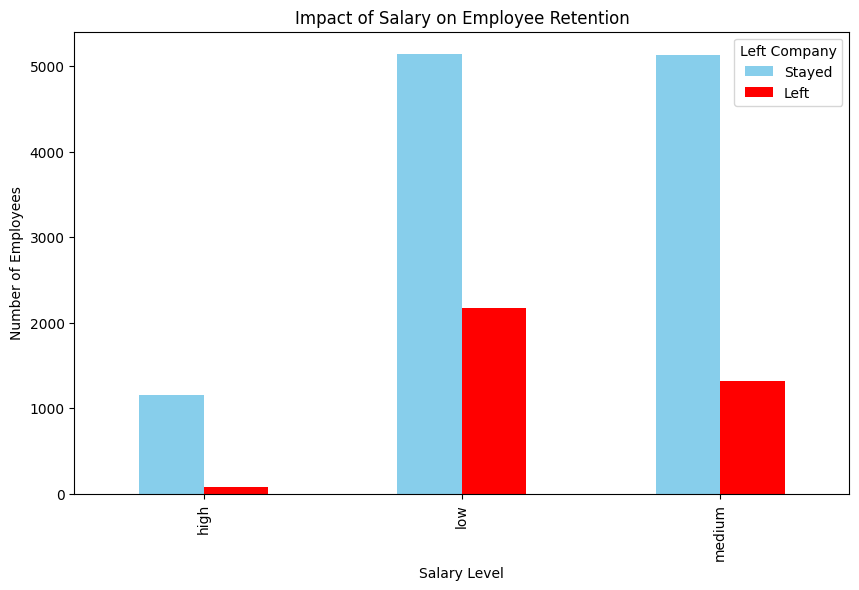

In [163]:
# plt.scatter(df.left,df.salary,marker='+',color='red')

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df[['left']],df.salary,train_size=0.9,random_state=10)
# X_train.shape
# X_test
salary_impact = df.groupby(['salary', 'left']).size().unstack()

# Plot the bar chart
salary_impact.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'red'])
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Left Company', labels=['Stayed', 'Left'])
plt.show()

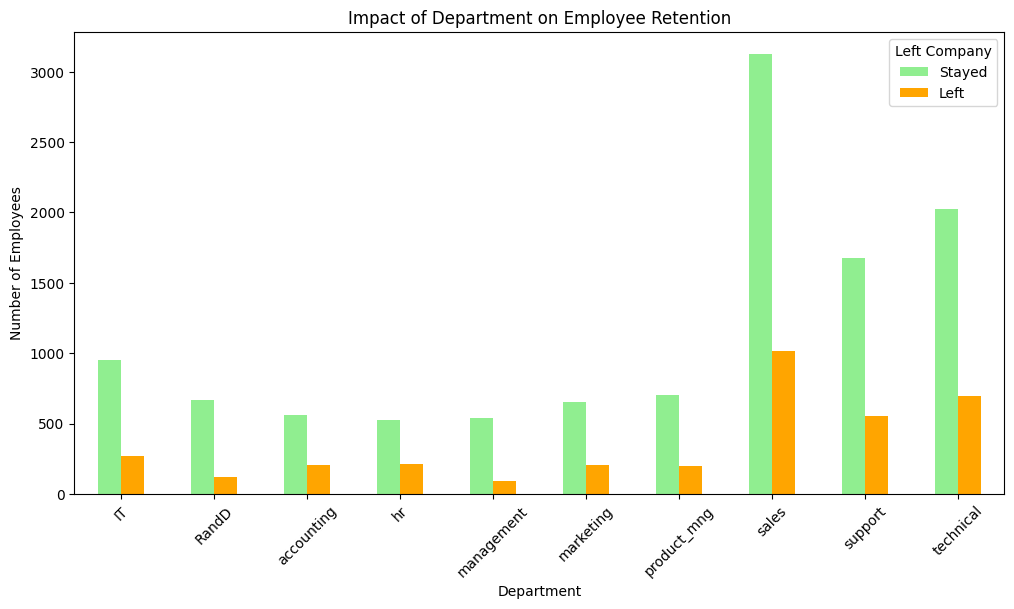

In [164]:
dept_impact = df.groupby(['Department', 'left']).size().unstack()

# Plot the bar chart
dept_impact.plot(kind='bar', stacked=False, figsize=(12, 6), color=['lightgreen', 'orange'])
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Left Company', labels=['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.show()

In [165]:
# encoder = OrdinalEncoder(categories=[['high', 'medium', 'low']])
# df['salary_new'] = encoder.fit_transform(df[['salary']])
df = pd.get_dummies(df, columns=['salary'], drop_first=True)
df = pd.get_dummies(df, columns=['Department'], drop_first=True)
df
# Define the features (X) and target variable (y)
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary_medium', 'salary_low']]
y = df['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression Model: {accuracy:.2f}')

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(conf_matrix)

# # Classification Report
# class_report = classification_report(y_test, y_pred)
# print('Classification Report:')
# print(class_report)

Accuracy of the Logistic Regression Model: 0.78


In [166]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression Model: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy of the Logistic Regression Model: 0.78
Confusion Matrix:
[[3172  256]
 [ 744  328]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      3428
           1       0.56      0.31      0.40      1072

    accuracy                           0.78      4500
   macro avg       0.69      0.62      0.63      4500
weighted avg       0.75      0.78      0.75      4500



In [167]:
zoo_data = pd.read_csv("zoo-data.csv")
# Load the class type data
class_type = pd.read_csv("zoo-class-type.csv")

# Display the first few rows of the datasets
print("Zoo Data:")
print(zoo_data.head())
print("\nClass Type Data:")
print(class_type.head())

# Step 2: Data Preprocessing
# Check for missing values
print("\nMissing values in zoo data:")
print(zoo_data.isnull().sum())

# Check for missing values in class_type data
print("\nMissing values in class type data:")
print(class_type.isnull().sum())

# encoder = OrdinalEncoder()
# class_type['Class_Type'] = encoder.fit_transform(class_type[['Class_Type']])
# Merge the datasets to get the class_type description (if needed)
zoo_data = pd.merge(zoo_data, class_type, left_on='class_type', right_on='Class_Number', how='left')

Zoo Data:
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2         

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 1.00


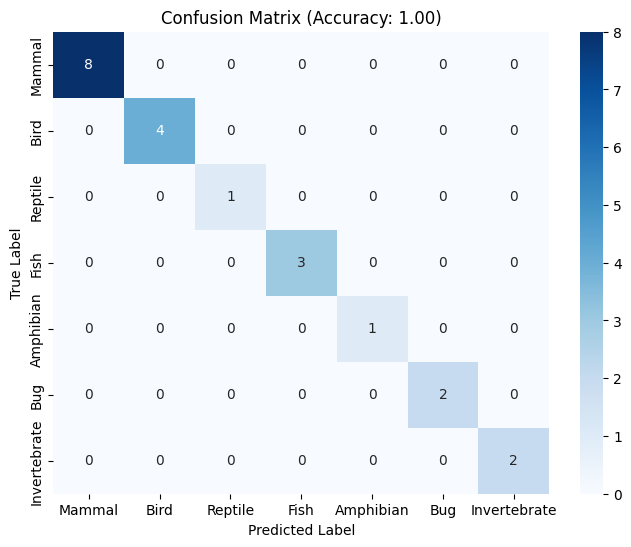

In [170]:
# zoo_data = zoo_data.drop(columns=['animal_name'])
# # Separate features (X) and target (y)
# X = zoo_data.drop(columns=['class_type','class_type'])
# y = zoo_data['class_type']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'\nAccuracy of the Logistic Regression Model: {accuracy:.2f}')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


zoo_data = pd.read_csv("zoo-data.csv")
class_type = pd.read_csv("zoo-class-type.csv")


zoo_data = zoo_data.drop(columns=["animal_name"])


X = zoo_data.drop(columns=["class_type"])
y = zoo_data["class_type"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=100)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_type["Class_Type"], yticklabels=class_type["Class_Type"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()
